In [28]:
import pandas as pd
import matplotlib.pyplot as plt


In [29]:
df = pd.read_csv('first_project.csv', parse_dates=['order_date'], date_format = '%Y-%m-%d')
df.head()

,order_id,order_date,product,category,price,quantity,region
0,1,2024-01-05,Phone A,Electronics,300,2,West
1,2,2024-01-06,Laptop B,Electronics,900,1,East
2,3,2024-01-10,Headphones C,Accessories,50,3,West
3,4,2024-02-02,Phone A,Electronics,300,1,North
4,5,2024-02-15,Mouse D,Accessories,25,4,South


In [30]:
df.dtypes

order_id               int64
order_date    datetime64[ns]
product               object
category              object
price                  int64
quantity               int64
region                object
dtype: object

In [31]:
df['revenue'] = df['price'] * df['quantity']
df

,order_id,order_date,product,category,price,quantity,region,revenue
0,1,2024-01-05,Phone A,Electronics,300,2,West,600
1,2,2024-01-06,Laptop B,Electronics,900,1,East,900
2,3,2024-01-10,Headphones C,Accessories,50,3,West,150
3,4,2024-02-02,Phone A,Electronics,300,1,North,300
4,5,2024-02-15,Mouse D,Accessories,25,4,South,100
5,6,2024-03-01,Laptop B,Electronics,900,2,West,1800
6,7,2024-03-05,Phone A,Electronics,300,1,East,300
7,8,2024-03-18,Headphones C,Accessories,50,2,North,100
8,9,2024-04-01,Mouse D,Accessories,25,5,West,125
9,10,2024-04-20,Laptop B,Electronics,900,1,South,900


In [32]:
df.describe()

,order_id,order_date,price,quantity,revenue
count,10.00000,10,10.000000,10.000000,10.000000
mean,5.50000,2024-02-19 16:48:00,375.000000,2.200000,527.500000
min,1.00000,2024-01-05 00:00:00,25.000000,1.000000,100.000000
25%,3.25000,2024-01-15 18:00:00,50.000000,1.000000,131.250000
50%,5.50000,2024-02-22 12:00:00,300.000000,2.000000,300.000000
75%,7.75000,2024-03-14 18:00:00,750.000000,2.750000,825.000000
max,10.00000,2024-04-20 00:00:00,900.000000,5.000000,1800.000000
std,3.02765,NaN,380.058475,1.398412,545.238225


In [33]:
df.sum(numeric_only=True)


order_id      55
price       3750
quantity      22
revenue     5275
dtype: int64

In [34]:
df.groupby('product')['revenue'].sum()


product
Headphones C     250
Laptop B        3600
Mouse D          225
Phone A         1200
Name: revenue, dtype: int64

In [35]:
df.groupby('region')['revenue'].sum()

region
East     1200
North     400
South    1000
West     2675
Name: revenue, dtype: int64

In [36]:
df['month'] = df['order_date'].dt.to_period('M')
monthly_revenue = df.groupby('month')['revenue'].sum()
print(monthly_revenue)


month
2024-01    1650
2024-02     400
2024-03    2200
2024-04    1025
Freq: M, Name: revenue, dtype: int64


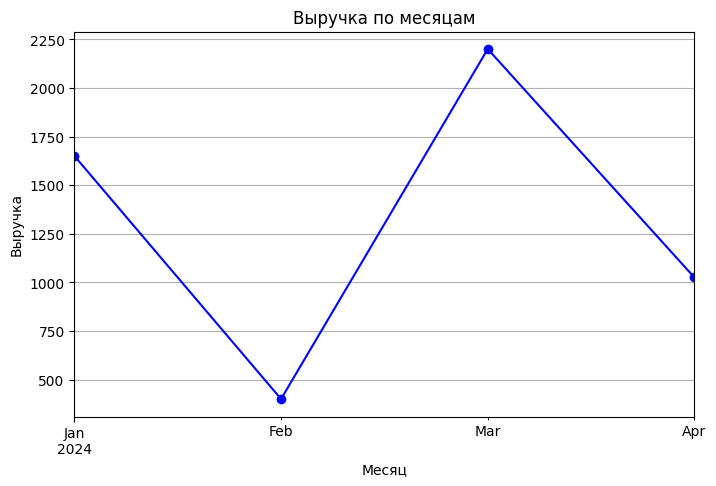

In [37]:
import matplotlib.pyplot as plt

monthly_revenue.plot(kind='line', marker='o', figsize=(8,5), color='blue')
plt.title('Выручка по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.grid(True)
plt.show()
